# Assingment

For your assignment you will re-derive and implement logistic regression and optimize the parameters with Gradient Descent and with the Newton's method. Also, in this exercise you will re-derive and implement Gassian Discriminant Analysis.
We will use the files logistic_x.txt and logistic_y.txt. The first contains the feature values $x^{(i)}_1$ and $x^{(i)}_2$ for the $i$-th data sample $x^{(i)}$. The second contains the ground truth label $y^{(i)}$ for each corresponding data sample.

## Notation

- $x^i$ is the $i^{th}$ feature vector
- $y^i$ is the expected outcome for the $i^{th}$ training example
- $m$ is the number of training examples
- $n$ is the number of features

## [15 points] Question 1: Logistic Regression with Gradient Ascent

### (a) [5 points] Equations for the log likelihood, its gradient, and the gradient ascent update rule.

Write and simplify the likelihood $L(\theta)$ and log-likelihood $l(\theta)$ of the parameters $\theta$.

Recall the probabilistic interpretation of the hypothesis $h_\theta(x)= P(y=1|x;\theta)$ and that $h_\theta(x)=\frac{1}{1+\exp(-\theta^T x)}$.

Also derive the gradient $\frac{\delta l(\theta)}{\delta \theta_j}$ of $l(\theta)$ and write the gradient update equation. 

Question: in order to learn the optimal $\theta$, do you need to minimize or to maximize $l(\theta)$?

### Likelihood

The hypothesis of the logistic regression model assumes that $y$ can be assimilated to a Bernoulli random variable, but instead of having a fixed and constant parameter $p = \mathbb{P}(y = 1)$ we are going to use the sigmoid function. Since we are trying to evaluate whether $y$ equals 1 or 0 based on a set of variables $x$, the sigmoid function expresses the influence that those variables $x$ can have on the value of the target $y$.

On the other hand, the sigmoid function has a range between 0 and 1, therefore it is a perfect fit for the parameter $p$ of the Bernoulli distribution mentioned previously.

The Likelihood is defined as the product of the probabilities of the sample values $y^{(i)}$.

$$\mathbb{P}(y = y^{(i)} \mid x = x^{(i)}, \theta) = h_{\theta}(x^{(i)})^{y^{i}}\left( 1 - h_{\theta}(x^{(i)})\right)^{y^{(i)}}$$


$$L(\theta) = \prod_{i = 1}^{m} h_{\theta}\left(x^{(i)}\right)^{y^{(i)}}\left(1 - h_{\theta}\left(x^{(i)}\right)\right)^{1 - y^{(i)}}$$

$$L(\theta) = \prod_{i = 1}^{m} \left(\frac{1}{1 + exp(-\theta^{T}x^{(i)})}\right)^{y^{(i)}} \left(\frac{1}{1 + exp(\theta^{T}x^{(i)})} \right)^{1 - y^{(i)}}$$

### Log-likelihood

$$
l(\theta) = \sum_{i = 1}^{m} \left( y^{(i)}log\left(\frac{1}{1 + exp(-\theta^{T}x^{(i)})}\right) + (1 - y^{(i)})log\left(\frac{1}{1 + exp(\theta^{T}x^{(i)}}\right)\right)
$$

Given that 
$$
\frac{1}{1 + exp(-\theta^{T}x^{(i)})} = \frac{exp(\theta^{T}x^{(i)})}{1 + exp(\theta^{T}x^{(i)})}
$$

We rewrite the log-likelihood as

$$
l(\theta) = \sum_{i = 1}^{m} \left(
y^{(i)}\theta^{T}x^{(i)} - y^{i}log\left(1 + exp(\theta^{T}x^{(i)})\right) + (y^{(i)} - 1)log\left(1 + exp(\theta^{T}x^{(i)})\right)
\right)
$$

Finally

$$
l(\theta) = \sum_{i = 1}^{m} \left(y^{i}\theta^{T}x^{i} - log\left(1 + exp(\theta^{T}x^{(i)})\right)\right) = yx\theta - log(1 + exp(x\theta))
$$

### Gradient of the log-likelihood

First, we calculate $\frac{\delta l(\theta)}{\theta_{0}}$ :
$$ \frac{\delta l(\theta)}{\delta\theta_{0}} = \sum_{i = 1}^{m} \left(y^{(i)} - \frac{exp(\theta^{T}x^{(i)})}{1 + exp(\theta^{T}x^{(i)})} \right)$$

Then, for all $j = 1, \dots, n$ :
$$
\frac{\delta l(\theta)}{\delta\theta_{j}} = \sum_{i = 1}^{m} \left(y^{(i)}x^{(i)}_{j} - \frac{x^{(i)}_{j}exp(\theta^{T}x^{(i)})}{1 + exp(\theta^{T}x^{(i)})} \right)
$$

$$
\frac{\delta l(\theta)}{\delta\theta_{j}} = \sum_{i = 1}^{m} x^{(i)}_{j}(y^{(i)} - h_\theta(x^{(i)}))
$$


Where $x^{(i)}_{j}$ is the $j^{th}$ feature of the $i^{th}$ vector

Generally, the gradient of the log-likelihood is expressed as :
$$ \nabla l(\theta) = x(y - h_{\theta}(x)) $$

Where $h_{\theta}(x) = (h_{\theta}(x^{(i)}))_{1 \le i\le m}$

The gradient update equation for a gradient ascent algorithm is then 

$$ \theta^{(k+1)} = \theta^{(k)} + \alpha \nabla l(\theta^{(k)}) $$ 

Where $\theta^{(k)}$ is the $k^{th}$ iteration of $\theta$

### Gradient ascent

In order to learn the optimal $\theta$, we need to maximize the log-likelihood $l_{\theta}$. In fact, the likelihood represents how good the model parameter $\theta$ is fitting the data sample ($x$, $y$). As it is composed of probabilities, the higher the value of the Likelihood function is when a value of $\theta$ is applied, the more it is likely to recreate the data sample with that value of $\theta$. Besides, maximizing a function is equivalent to maximizing its natural logarithm (because the $log$ function is a continuous increasing function).


This estimation is called **maximum likelihood estimation**.

Naturally, the Likelihood is at its maximum value when its gradient is equal to zero. With the logistic regression model, it is hard to get an analytic formula for the parameter $\theta$ ensuring the nullity of the gradient. We use, instead, an approximated solution by computing an optimization algorithm in order to maximize the log-Likelihood $l(\theta)$.


The gradient $\nabla_{\theta}(l)$ gives the slope of the directions in which the log-likelihood increases more rapidly. The
gradient vector can be interpreted as the direction and rate of the fastest increase. Therefore, adding $\alpha \nabla_{\theta} l(\theta)$ to the actual value of $\theta$ makes $\theta$ move closer to the maxima of the log-likelihood.


The gradient update equation for a gradient ascent algorithm is then :

$$ \theta^{(k+1)} = \theta^{(k)} + \alpha \nabla l(\theta^{(k)}) $$ 

Where $\theta^{(k)}$ is the $k^{th}$ iteration of $\theta$. $\alpha$ is the learning rate.


### (b) [10 points] Implementation of logistic regression with Gradient Ascent

Code up the equations above to learn the logistic regression parameters. Consider as data the files logistic_x.txt and logistic_y.txt. The first contains the feature values $x^{(i)}_1$ and $x^{(i)}_2$ for the $i$-th data sample $x^{(i)}$. The second contains the ground truth label $y^{(i)}$ for each corresponding data sample.

In [1]:
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import scipy as sp # imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm # allows us easy access to colormaps
import matplotlib.pyplot as plt # sets up plotting under plt
import pandas as pd # lets us handle data as dataframes

# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns # sets up styles and gives us more plotting options

Let's start by loading the data into two pandas DataFrames:

In [2]:
df_x = pd.read_csv("/Users/clementerecine/Desktop/FDS/assignments/Assignment2/data/logistic_x.txt", sep="\ +", names=["x1","x2"], header=None, engine='python')
df_y = pd.read_csv('/Users/clementerecine/Desktop/FDS/assignments/Assignment2/data/logistic_y.txt', sep='\ +', names=["y"], header=None, engine='python')
df_y = df_y.astype(int)
df_x.head()

,x1,x2
0,1.343250,-1.331148
1,1.820553,-0.634668
2,0.986321,-1.888576
3,1.944373,-1.635452
4,0.976734,-1.353315


In [3]:
df_y.head()

,y
0,-1
1,-1
2,-1
3,-1
4,-1


Let's get the NumPy arrays from the dataset, and add a column of 1's to $X$ to take into account the zero intercept

In [4]:
x = np.hstack([np.ones((df_x.shape[0], 1)), df_x[["x1","x2"]].values])
y = df_y["y"].values

Adjust y so that $y^{(i)}\in [0,1]$

In [5]:
for i in range(len(y)) :
    if y[i] == -1 :
        y[i] = 0
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

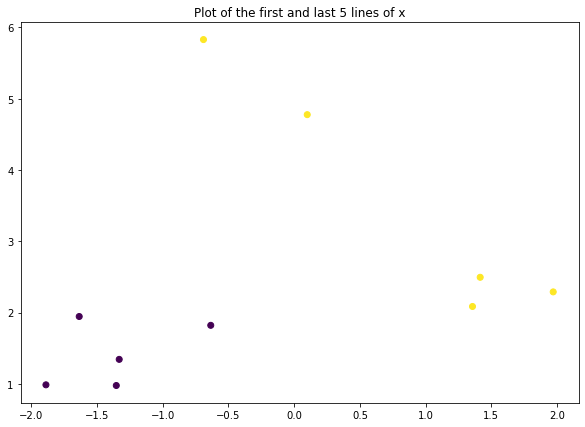

In [6]:
# Plot the first and last 5 lines of x, now containing features x0 (constant=1), x1 and x2
figure = plt.figure(figsize = (10, 7))
plt.scatter([x[:5,:][:,2],x[-5:,:][:,2]],
            [x[:5,:][:,1],x[-5:,:][:,1]],
            c = [y[:5],y[-5:]])
plt.title('Plot of the first and last 5 lines of x')
plt.show()

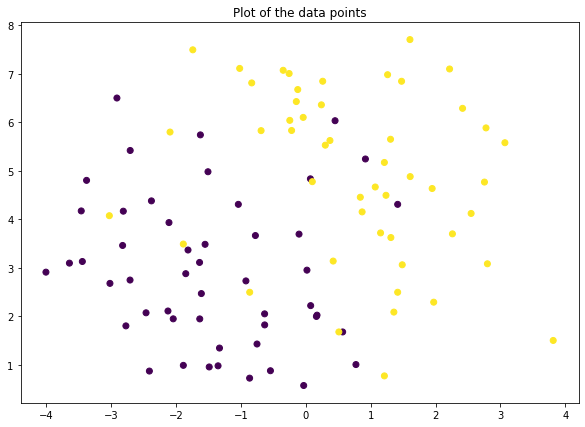

In [7]:

figure = plt.figure(figsize = (10, 7))
plt.scatter(x[:,2],
            x[:,1],
            c = y)
plt.title('Plot of the data points')
plt.show()


Define the sigmoid function "sigmoid", the function to compute the gradient of the log likelihood  "grad_l" and the gradient ascent algorithm.

In [8]:
def sigmoid(x):
    g =  1/(1 + np.exp(-x))
    return g

def log_likelihood(theta, x ,y):
    log_L = np.sum(y*np.dot(x, theta) - np.log(1 + np.exp(np.dot(x, theta))))
    return log_L

def grad_l(theta, x, y):
    G = np.dot(x.T, y - sigmoid(np.dot(x, theta)))
    return G

def gradient_ascent(theta, x, y, G, alpha = 0.01, iterations = 100):
    m = len(y)
    log_l_history = np.zeros(iterations) #Intializing the log_l_history with zeros
    theta_history = np.zeros((iterations,3)) #Initializeing the theta_history with zeros
    log_l_history[0] = log_likelihood(theta, x, y) #Storing the first value of the log-likelihood applied on theta0
    theta_history[0] = theta #Storing the first value of theta (theta0)
    
    #Create a loop for the iterations in order to update with the gradient ascent
    for i in range(1, iterations) : 
        theta = theta + alpha*G #equation update of the gradient ascent
        log_l_history[i] = log_likelihood(theta, x, y) #computing the log likelihood of the i-th iteration of theta and storing it in the log_l_history
        theta_history[i] = theta #storing the i-th iteration of theta in theta_history
        G = grad_l(theta, x, y) #computing the gradient of the log-likelihood applied on the updated value of theta
    
    return theta, log_l_history, theta_history

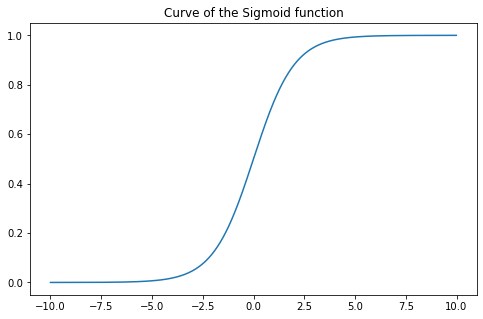

In [9]:
L = [i*0.01 for i in range(-1000, 1000)]
figure = plt.figure(figsize = (8, 5))
plt.plot(L, [sigmoid(x) for x in L])
plt.title('Curve of the Sigmoid function')
plt.show()

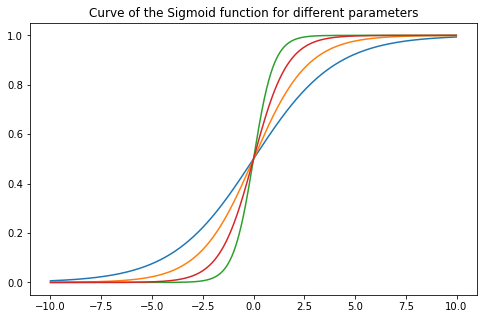

In [10]:
L = [i*0.01 for i in range(-1000, 1000)]
figure = plt.figure(figsize = (8, 5))
plt.plot(L, [sigmoid(0.5*x) for x in L])
plt.plot(L, [sigmoid(0.75*x) for x in L])
plt.plot(L, [sigmoid(2*x) for x in L])
plt.plot(L, [sigmoid(1.2*x) for x in L])
plt.title('Curve of the Sigmoid function for different parameters')
plt.show()

Check your grad_l implementation:
grad_l applied to the theta_test (defined below) should provide a value for log_l_test close to the target_value (defined below); in other words the error_test should be 0, up to machine error precision.

In [11]:
target_value = -0.4250958770469834
theta_test = np.array([-2, 1, 2])

log_l_test = log_likelihood(theta_test, x, y)
error_test = np.abs(log_l_test/100 - target_value)

#print("{:f}".format(error_test))
print(error_test)

0.004250958770469826


Let's now apply the function gradient_ascent and print the final theta as well as theta_history 

In [12]:
# Initialize theta0
theta0 = np.zeros(x.shape[1])

# Run Gradient Ascent method
n_iter = 1000
theta_final, log_l_history, theta_history = gradient_ascent(theta0, x, y, grad_l(theta0, x, y), alpha = 0.1, iterations = n_iter)
print(theta_final)
print(theta_history)

[-16.7574605    4.27162708   4.83219025]
[[  0.           0.           0.        ]
 [ -0.05         4.76690475   5.49282319]
 [ -3.49321183  -6.81357608   9.01968543]
 ...
 [-17.31076865   4.48496626   6.31001506]
 [-17.04066588   4.40857204   5.52192366]
 [-16.7574605    4.27162708   4.83219025]]


Let's plot the log likelihood over iterations

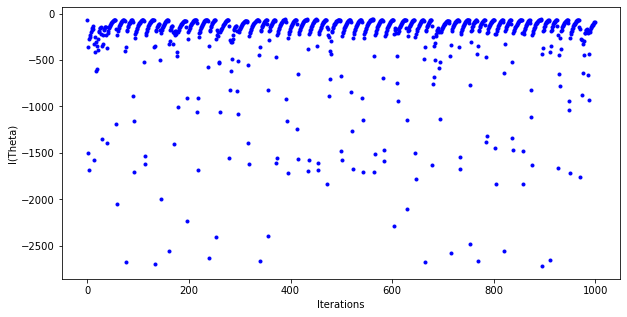

In [13]:
fig,ax = plt.subplots(num = 2, figsize = (10, 5))

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(len(log_l_history)), log_l_history, 'b.')
plt.show()

Plot the data and the decision boundary:

In [14]:
df_x_pl=df_x.copy()
df_y_pl=df_y.copy()
df_x_pl.insert(0, "y", df_y)
df_x_pl["y"] = pd.to_numeric(df_x_pl["y"], downcast='signed')
df_x_pl.head()

,y,x1,x2
0,0,1.343250,-1.331148
1,0,1.820553,-0.634668
2,0,0.986321,-1.888576
3,0,1.944373,-1.635452
4,0,0.976734,-1.353315


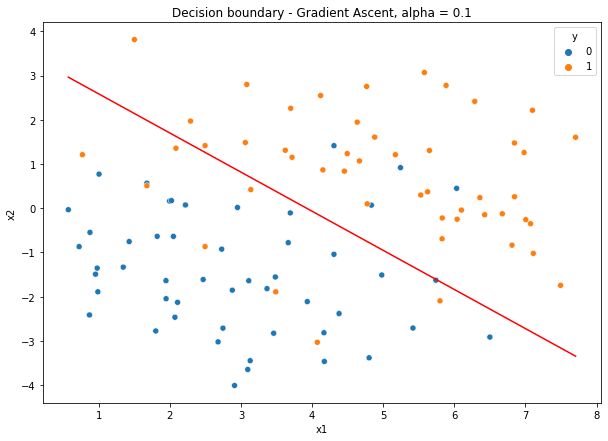

In [15]:
# Generate vector to plot decision boundary
x1_vec = np.linspace(df_x_pl["x1"].min(),df_x_pl["x1"].max(),2);

figure = plt.figure(figsize = (10, 7))

# Plot raw data
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

# Plot decision boundary
plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red");
plt.title('Decision boundary - Gradient Ascent, alpha = 0.1')
# Save the theta_final value for later comparisons
theta_GA = theta_final.copy()

Write now your considerations. Discuss in particular:
- what effects do the learning rate $\alpha$ and the number of iterations have on the computed $\theta$
- may you still achieve the same value if you decrease the learning rate $\alpha$ and increase the number of iterations n_iter up to an infinite number of them? Why?
- may you still achieve the same value if you increase the learning rate $\alpha$ substantially and decrease the number of iterations n_iter? Why?

Substantiate your answer with experiments and plots of the $l(\theta)$ and the decision boundary.



Through the plot of the log-likelihood for the learning rate $\alpha$ set to 0.1, firstly that the log-likelihood fluctuates a lot and, secondly, that its evolution is not monotonous.

Let's change the learning rate $\alpha$.

In [16]:
n_iter = 1000
theta_final, log_l_history, theta_history = gradient_ascent(theta0, x, y, grad_l(theta0, x, y), alpha = 0.01, iterations = n_iter)
print(theta_final)

[-2.62051152  0.76037152  1.17194674]


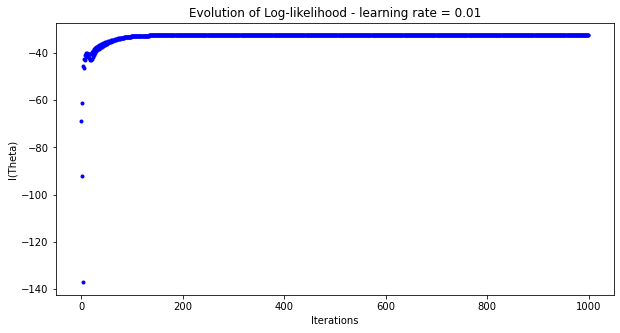

In [17]:
fig,ax = plt.subplots(num=2, figsize = (10, 5))
ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(len(log_l_history)), log_l_history, 'b.')
plt.title('Evolution of Log-likelihood - learning rate = 0.01')
plt.show()

We can see that, by decreasing the value of the learning rate $\alpha$, we compute a better maximisation of the log-likelihood. The plot above shows better convergence to the maximum.

We will also compute the differences between each two consecutive iterations of $\theta$ so that we can quantify the effect of the iterations.


In [18]:
theta_diff = np.zeros(theta_history.shape)
for i in range(1, len(theta_history)) :
    theta_diff[i] = theta_history[i] - theta_history[i-1]

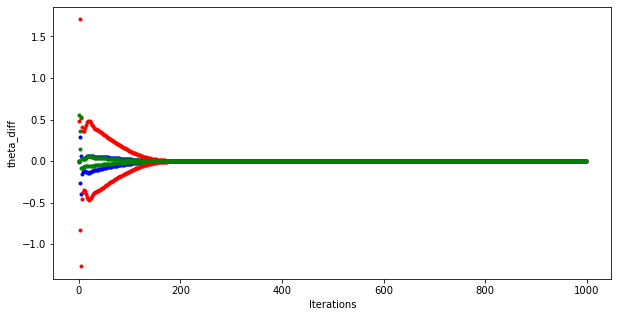

In [19]:
fig,ax = plt.subplots(num=2, figsize = (10, 5))
ax.set_ylabel('theta_diff')
ax.set_xlabel('Iterations')
#ax.plot(range(len(log_l_history)), log_l_history, 'b.')
ax.plot(range(len(theta_diff)), theta_diff[:,0], 'b.')
ax.plot(range(len(theta_diff)), theta_diff[:,1], 'r.')
ax.plot(range(len(theta_diff)), theta_diff[:,2], 'g.')
plt.show()

The given plot shows that after a certain number of iterations (about 200 iterations), the three components of $\theta$ do not change and remain constant. This shows that the algorithm has converged.

Let's see what happens if we increase it instead. (increase alpha?)

<ipython-input-8-29159c2a6d89>:2: RuntimeWarning: overflow encountered in exp
  g =  1/(1 + np.exp(-x))
<ipython-input-8-29159c2a6d89>:6: RuntimeWarning: overflow encountered in exp
  log_L = np.sum(y*np.dot(x, theta) - np.log(1 + np.exp(np.dot(x, theta))))


[-159.05547118   43.80567511   85.78229951]


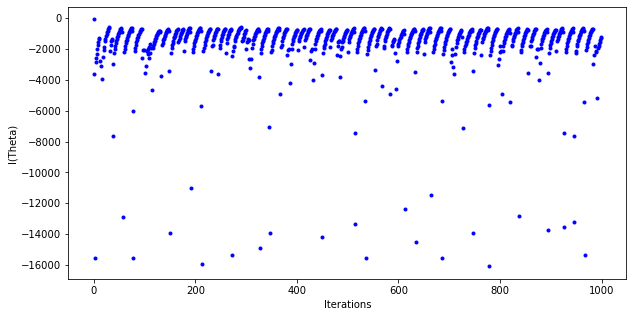

In [20]:
n_iter = 1000
theta_final, log_l_history, theta_history = gradient_ascent(theta0, x, y, grad_l(theta0, x, y), alpha = 1, iterations = n_iter)
print(theta_final)
fig,ax = plt.subplots(num = 2, figsize = (10, 5))
ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(len(log_l_history)), log_l_history, 'b.')
plt.show()

We can clearly see, thanks to the plot, that the algorithm does not converge

Let's now see the influence of the number of iterations; we have seen that with a lower value of $\alpha$ the speed of convergence is relatively high.

We will now change the n_iter to $10^{6}$, while keeping $\alpha = 1$


In [21]:
n_iter = 1000000
theta_final, log_l_history, theta_history = gradient_ascent(theta0, x, y, grad_l(theta0, x, y), alpha = 1, iterations = n_iter)
print(theta_final)

<ipython-input-8-29159c2a6d89>:2: RuntimeWarning: overflow encountered in exp
  g =  1/(1 + np.exp(-x))
<ipython-input-8-29159c2a6d89>:6: RuntimeWarning: overflow encountered in exp
  log_L = np.sum(y*np.dot(x, theta) - np.log(1 + np.exp(np.dot(x, theta))))


[-131.92118018  110.06630073   35.02407699]


Let's plot the log-likelihood over the iterations

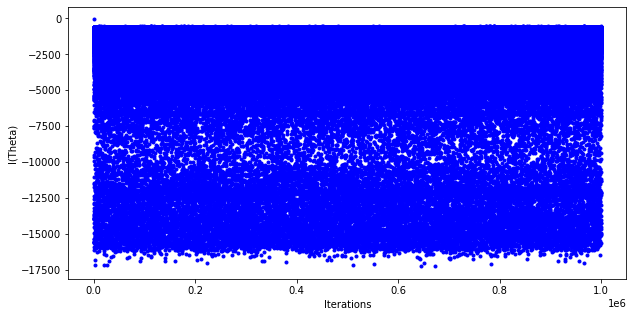

In [22]:
fig,ax = plt.subplots(num = 2, figsize = (10, 5))
ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(len(log_l_history)), log_l_history, 'b.')
plt.show() 

To understand what happens in a more clear way, let us plot the log-likelihood history on the last 1000 iterations.

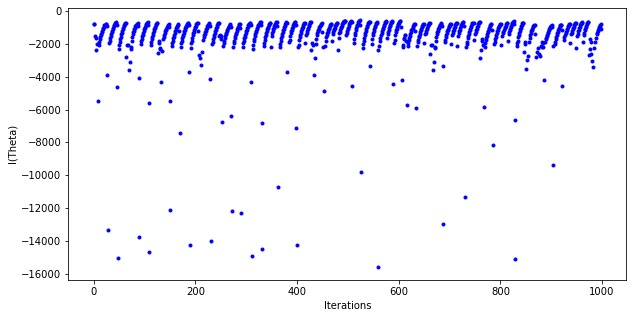

In [23]:
fig,ax = plt.subplots(num = 2, figsize = (10, 5))
ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(len(log_l_history[-1000:])), log_l_history[-1000:], 'b.')
plt.show()

In [24]:
theta_diff = np.zeros(theta_history.shape)
for i in range(1, len(theta_history)) :
    theta_diff[i] = theta_history[i] - theta_history[i-1]

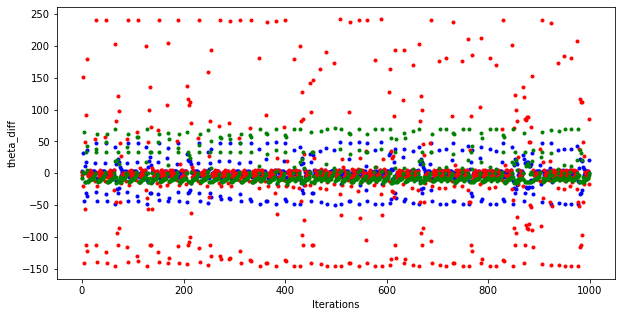

In [25]:
fig,ax = plt.subplots(num=2, figsize = (10, 5))
ax.set_ylabel('theta_diff')
ax.set_xlabel('Iterations')
#ax.plot(range(len(log_l_history)), log_l_history, 'b.')
ax.plot(range(len(theta_diff[-1000:])), theta_diff[:,0][-1000:], 'b.')
ax.plot(range(len(theta_diff[-1000:])), theta_diff[:,1][-1000:], 'r.')
ax.plot(range(len(theta_diff[-1000:])), theta_diff[:,2][-1000:], 'g.')
plt.show()

We can conclude that, increasing the number of iterations for certain learning rates $\alpha$ does not solve the problem of convergence. In fact, the fluctuations of the log-likelihood are due to the important values of its gradient.

Having a relatively high gradient values won't help achieving the maximum. It is thus necessary to choose a lower learning rate $\alpha$ in order to compensate those gradients.

Let's run the gradient ascent with the same number of iterations but with a lower $\alpha$ (0.01).


In [26]:
n_iter = 1000000
theta_final, log_l_history, theta_history = gradient_ascent(theta0, x, y, grad_l(theta0, x, y), alpha = 0.01, iterations = n_iter)
print(theta_final)

[-2.6205116   0.76037154  1.17194674]


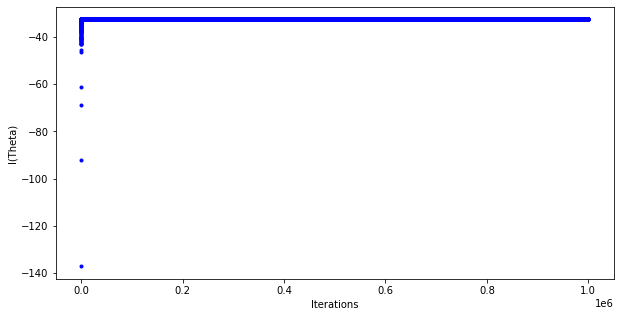

In [27]:
fig,ax = plt.subplots(num = 2, figsize = (10, 5))
ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(len(log_l_history)), log_l_history, 'b.')
plt.show() 

As mentionned previously, increasing the number of iterations for a low learning rate does not affect the optimization.
This is due to the fact that the log-likelihood almost achieves its maximum, therefore the gradient of the log-likelihood decreases with each iterations and  the update equation does not significantly change the value of $\theta$. 

Adding an almost null perturbation to $\theta$ would not affect the learning of the parameters.


## [15 points] Question 2: Logistic Regression with the Newton's method

### (a) [5 points] Equations for the Hessian of the log likelihood

Derive the equation for the Hessian matrix $H$ of the log-likelihood $l(\theta)$ of the parameters $\theta$.

Recall that: $H_{i,j} = \frac{\delta^2 l(\theta)}{\delta \theta_i \delta \theta_j}$

Also write the parameter update rule for the Newton's method, as a function of the Hessian and gradient of $l(\theta)$.

Question: in order to learn the optimal $\theta$, do you need to minimize or to maximize $\nabla_{\theta} l$?

### Hessian matrix

$$ H_{i,j} = \frac{\delta^{2} l(\theta)}{\delta\theta_{i}\delta\theta_{j}} \in\mathbb\{R\}^{(n+1)(n+1)} $$

Based on the gradient computations did previously, we have :

$$ \forall j = 0,\dots,n : \quad \frac{\delta l(\theta)}{\delta \theta_{j}} = \sum_{k = 1}^{m} x_{j}^{(k)}\left(y^{(k)} - h_{\theta}(x^{(k)})\right) $$

Derivating by $\frac{\delta l(\theta)}{\delta \theta_{j}}$ by $\theta_{i}$ leads to

$$
\forall j = 0, \dots, n \quad \forall i = 0, \dots, n : \quad
\frac{\delta^{2} l(\theta)}{\delta \theta_{i} \delta \theta_{j}} 
= 
\sum_{k = 1}^{m}x_{j}^{(k)}\frac{\delta h_{\theta}(x^{(k)})}{\delta \theta_{i}}
$$

Where 
$$\frac{\delta h_{\theta}(x^{(k)})}{\delta \theta_{i}} = \frac{x_{i}^{(k)}exp(-\theta^{T}x^{(k)})}{\left(1 + exp(-\theta^{T}x^{(k)})\right)^{2}}$$

Furthermore

$$\frac{exp(-\theta^{T}x^{(k)})}{\left(1 + exp(-\theta^{T}x^{(k)})\right)^{2}} 
=
\frac{1}{1 + exp(\theta^{T}x^{(k)})}\frac{1}{1 + exp(-\theta^{T}x^{(k)})} = h_{\theta}(x^{(k)})(1 - h_{\theta}(x^{(k)}))
$$


Therefore

$$ \frac{\delta^{2} l(\theta)}{\delta\theta_{i}\delta\theta_{j}} = -\sum_{k = 1}^{m} x_{j}^{(k)}x_{i}^{(k)}(1 - h_{\theta}(x^{(k)}))h_{\theta}(x^{(k)}) $$

Finally, we conclude that

$$ H(\theta) = -X^{T}DX $$

Where 

$$D = diag\left((1 - h_{\theta}(x^{(k)}))h_{\theta}(x^{(k)})\right) = 
\begin{pmatrix}
\left(1 - h_{\theta}(x^{(1)})\right)h_{\theta}(x^{(1)}) & 0 & \dots & 0 \\
0 & \left(1 - h_{\theta}(x^{(2)}\right)h_{\theta}(x^{(2)}) & \dots & 0 \\
\dots & \dots & \dots & \dots \\
0 & 0 & \dots & \left(1 - h_{\theta}(x^{(m)}\right)h_{\theta}(x^{(m)})
\end{pmatrix}
$$


In order to learn the optimal $\theta$, we need to **minimize** $\nabla_{\theta} l$. In fact, as we have mentioned in the Gradient Ascent's section, the optimal $\theta$ achieves the maximum value for the log-likelihood, leading to a zero gradient. So in order to get a zero gradient, we must minimize it. 

The principle of the Newton's method is to maximize the objective function (the log-likelihood in our case). We can do a Taylor development of $l$ around a given $\theta$ :

$$l(\theta) = l(\theta') + (\theta - \theta')\nabla_{\theta}(l(\theta')) $$

The methods relies on finding $\theta$ based on the quantity $l(\theta') + (\theta - \theta')\nabla_{\theta}(l(\theta')))$

It assumes that $\theta = min_{\theta}\left(l(\theta') +(\theta - \theta')\nabla_{\theta}l(\theta')\right)$

Leading to
$$
\frac{\delta}{\delta\theta}\left(l(\theta') + (\theta - \theta')\nabla_{\theta}l(\theta')\right) = 0
$$

Therefore
$$ \nabla_{\theta}(l(\theta')) + (\theta - \theta')\frac{\delta^{2}l(\theta')}{\delta \theta \delta \theta^{T}} = 0 $$

We conclude that 
$$\theta = \theta' - \left(\frac{\delta^{2}l(\theta')}{\delta \theta \delta \theta^{T}}\right)^{-1}\nabla_{\theta}l(\theta')$$

Where
$$\frac{\delta ^{2} l(\theta')}{\delta\theta\delta\theta^{T}} = H(\theta')$$

Substituting $\theta$ and $\theta$ by respectively $\theta^{(k + 1)}$ and $\theta^{(k)}$, we get the following update equation for the Newton's method

$$ \theta^{(k + 1)} = \theta^{(k)} - H(\theta^{(k)})^{-1}\nabla_{\theta} l(\theta^{(k)}) $$ 


### (b) [10 points] Implementation of logistic regression with the Newton's method

Code up the equations above to learn the logistic regression parameters. Consider as data the files logistic_x.txt and logistic_y.txt. The first contains the feature values  $x^{(i)}_1$ and $x^{(i)}_2$  for the  𝑖 -th data sample  $x^{(i)}$ . The second contains the ground truth label  $y^{(i)}$  for each corresponding data sample.

Define the Hessian function hess_l and the Newton's method function "newton":

In [28]:
def hess_l(theta, x, y): 
    D = np.dot(np.diag(1 - sigmoid(np.dot(theta, x.T))), np.diag(sigmoid(np.dot(theta, x.T))))
    hess = -np.dot(x.T, np.dot(D,x))
    
    return hess

def newton(theta0, x, y, G, H, eps):
    log_l_history = [log_likelihood(theta0, x, y)] #initialize the log_l_history with the log likelihood of theta0
    theta_history = [theta0] #initialize the theta_history with the initial condition theta0
    grad_l_history = [G] #initialize the gradient history with G = grad_l(theta0)
    theta = theta0

    while (np.linalg.norm(G)) > eps :

        if np.linalg.det(H) != 0 : #To make sure the Hessian matrix is not singular (in order to compute its inverse)
            theta = theta - np.dot(np.linalg.inv(H), G) #the Newton's method update equation
            G = grad_l(theta, x, y) #Re-compute the gradient for the updated theta
            H = hess_l(theta, x, y) #Re-compute the Hessian matrix for the updated theta
            log_l_history.append(log_likelihood(theta, x, y)) #updating the history of the log-likelihood
            grad_l_history.append(G) #updating the history of the log-likelihood gradient
            theta_history.append(theta) #updating the history of theta
       
        else : #If the Hessian matrix is no more inversible, we break the loop
            break

    # return the optimized theta parameters,
    # as well as two lists containing the log likelihood's and values of theta at all iterations
    return theta, theta_history, log_l_history, grad_l_history

Check your hess_l implementation: hess_l applied to the theta_test (defined below) should provide a value for hess_l_test close to the target_value (defined below); in other words the error_test should be 0, up to machine error precision.



In [45]:
target_value = np.array([[-0.14357024, -0.43836134,  0.18767787], \
                         [-0.43836134, -1.72295801,  0.61817001], \
                         [ 0.18767787,  0.61817001, -0.51247901]])
theta_test=np.array([-2,1,2])

hess_l_test  = hess_l(theta_test,x,y)
error_test=np.sum(np.abs(hess_l_test-target_value),axis=(0,1))

print("{:f}".format(error_test))

191.932253


Now run Newton's method to perform logistic regression:

In [50]:
# Initialize theta0
#theta0 = np.zeros(x.shape[1])
theta0 = np.array([0, 0, 0])
# Run Newton's method
theta_final, theta_history, log_l_history, grad_l_history = newton(theta0, x, y, grad_l(theta0, x, y), hess_l(theta0, x, y), 1e-6)

In [51]:
theta_history

[array([0, 0, 0]),
 array([-1.50983811,  0.43509696,  0.62161752]),
 array([-2.21834632,  0.64372727,  0.95944716]),
 array([-2.55431051,  0.74137714,  1.13493588]),
 array([-2.61847133,  0.75979248,  1.1707512 ]),
 array([-2.62050954,  0.76037096,  1.17194549]),
 array([-2.6205116 ,  0.76037154,  1.17194674])]

In [53]:
log_l_history

[-68.62157087543459,
 -37.09774605002786,
 -33.09076344118557,
 -32.59883874849038,
 -32.58560887832779,
 -32.58559569828966,
 -32.58559569827549]

Let's plot the log likelihood over iterations



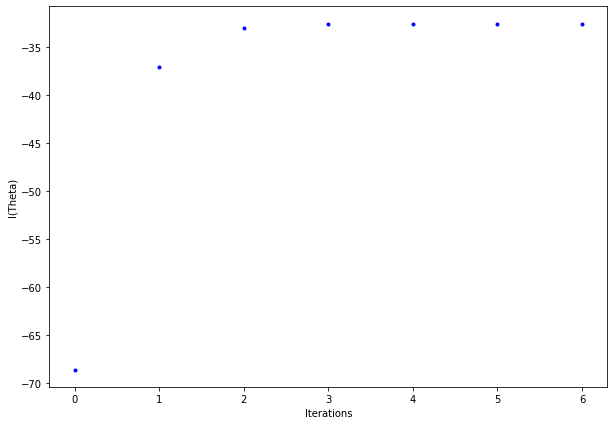

In [54]:
fig,ax = plt.subplots(num=2, figsize = (10, 7))

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(len(log_l_history)),log_l_history,'b.')


Plot the data and our decision boundary:



In [55]:
df_x_pl=df_x.copy()
df_y_pl=df_y.copy()
df_x_pl.insert(0, "y", df_y)
df_x_pl["y"] = pd.to_numeric(df_x_pl["y"],downcast='signed')
df_x_pl.head()

,y,x1,x2
0,0,1.343250,-1.331148
1,0,1.820553,-0.634668
2,0,0.986321,-1.888576
3,0,1.944373,-1.635452
4,0,0.976734,-1.353315


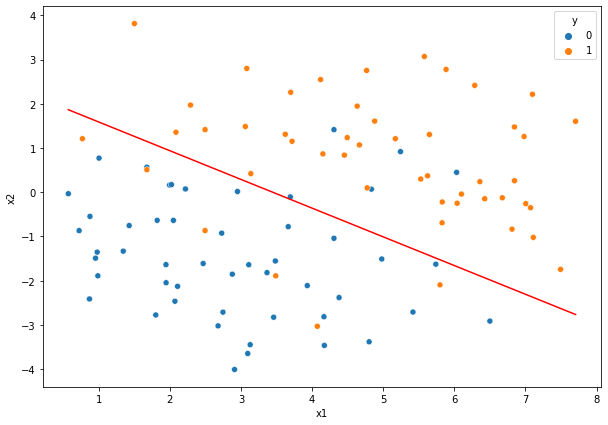

In [35]:
# Generate vector to plot decision boundary
x1_vec = np.linspace(df_x_pl["x1"].min(),df_x_pl["x1"].max(),2);

figure = plt.figure(figsize = (10, 7))
# Plot raw data
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

# Plot decision boundary
plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red");

Write now your considerations. Discuss in particular:
- the different convergence speed of the Newton's method, compared to Gradient Ascent
- the incurred cost for the different convergence speed



As we have seen, the Newton's method gives the same $\theta$ in a (much more) faster way. In fact, the number of iterations required to achieve the log-likelihood's maximum is 3, while the gradient ascent takes about 200 iterations to compute the final value of $\theta$.

On the other hand, the Newton's method ensures the (quadratic) convergence, while the Gradient Ascent requires to choose particular values for both the learning rate and the initial condition $\theta^{(0)}$.

Concerning the cost, if we look at one iteration of both updates (gradient ascent VS Newton's method), the Newton's method has a greater cost because it computes the Hessian matrix and its inverse, which involves a lot more computations. However, the number of iterations required in our case is far lower than the gradient ascent, which makes the Newton's method more efficient.

Of course if the number of features we have to consider is in the order of millions, then the Newton method starts to be non convenient.


## [7 points] Question 3: Logistic Regression with non linear boundaries

### (a) Polynomial features for logistic regression

Define new features, e.g. of 2nd and 3rd degrees, and learn a logistic regression classifier by using the new features, by using the Newton's optimization algorithm (or the gradient ascent one, if you like).

In particular, we would consider a polynomial boundary with equation:

$f(x_1, x_2) = c_0 + c_1 x_1 + c_2 x_2 + c_3 x_1^2 + c_4 x_2^2 + c_5 x_1 x_2 + c_6 x_1^3 + c_7 x_2^3 + c_8 x_1^2 x_2 + c_9 x_1 x_2^2$

We would therefore compute 7 new features: 3 new ones for the quadratic terms and 4 new ones for the cubic terms.

Create new arrays by stacking x (from the previous questions) and the new 7 features (in the order x1x1, x2x2, x1x2, x1x1x1, x2x2x2, x1x1x2, x1x2x2). In particular create x_new_quad by additionally stacking with x the quadratic features, and x_new_cubic by additionally stacking with x the quadratic and the cubic features.

In [56]:
# First extract features x1 and x2 from x and reshape them to x1 vector arrays
x1 = x[:,1]
x2 = x[:,2]
x1 = x1.reshape(x1.shape[0], 1)
x2 = x2.reshape(x2.shape[0], 1)
print(x[:5,:]) # For visualization of the first 5 values
print(x1[:5,:]) # For visualization of the first 5 values
print(x2[:5,:]) # For visualization of the first 5 values

[[ 1.          1.3432504  -1.3311479 ]
 [ 1.          1.8205529  -0.6346681 ]
 [ 1.          0.98632067 -1.8885762 ]
 [ 1.          1.9443734  -1.635452  ]
 [ 1.          0.97673352 -1.3533151 ]]
[[1.3432504 ]
 [1.8205529 ]
 [0.98632067]
 [1.9443734 ]
 [0.97673352]]
[[-1.3311479]
 [-0.6346681]
 [-1.8885762]
 [-1.635452 ]
 [-1.3533151]]


In [57]:
# Define features: x1x1, x2x2, x1x2, x1x1x1, x2x2x2, x1x1x2, x1x2x2

# Stack the features together together with x, to define
# x_new_quad [x, x1x1, x2x2, x1x2]
# and x_new_cubic [x, x1x1, x2x2, x1x2, x1x1x1, x2x2x2, x1x1x2, x1x2x2]

In [58]:
x1 = x[:,1]
x2 = x[:,2]
#reshaping the non-linear features in order to easily stack features to each other
x1x1 = (x[:,1]**2).reshape(-1, 1)
x2x2 = (x[:,2]**2).reshape(-1, 1)
x1x2 = (x[:,1]*x[:,2]).reshape(-1, 1)
x1x1x1 = (x[:,1]**3).reshape(-1, 1)
x2x2x2 = (x[:,2]**3).reshape(-1, 1)
x1x1x2 = (x[:,1]**2*x[:,2]).reshape(-1, 1)
x1x2x2 = (x[:,1]*x[:,2]**2).reshape(-1, 1)

In [59]:
#Stacking the features defined in the previous cell
x_new_quad = np.hstack([x, x1x1, x2x2, x1x2])
x_new_cubic = np.hstack([x, x1x1, x2x2, x1x2, x1x1x1, x2x2x2, x1x1x2, x1x2x2])

Now use the Newton's optimization algorithm to learn theta by maximizing the log-likelihood, both for the case of x_new_quad and x_new_cubic.

In [60]:
# Initialize theta0, in case of quadratic features
theta0_quad = np.zeros(x_new_quad.shape[1])

# Run Newton's method, in case of quadratic features
theta_final_quad, theta_history_quad, log_l_history_quad, grad_l_history_quad = newton(theta0_quad, x_new_quad, y, 
                                                                  grad_l(theta0_quad, x_new_quad, y),
                                                                  hess_l(theta0_quad, x_new_quad, y),
                                                                  1e-6)

# Initialize theta0, in case of quadratic and cubic features
theta0_cubic = np.zeros(x_new_cubic.shape[1])

# Run Newton's method, in case of quadratic and cubic features
theta_final_cubic, theta_history_cubic, log_l_history_cubic, grad_l_history_cubic = newton(theta0_cubic, x_new_cubic, y, 
                                                                     grad_l(theta0_cubic, x_new_cubic, y),
                                                                     hess_l(theta0_cubic, x_new_cubic, y),
                                                                     1e-6)

# check and compare with previous results
print(theta_final_quad)
print(theta_final_cubic)

[-2.01513398  0.17762534  1.91642971  0.07051926  0.18229119 -0.1295329 ]
[-15.80125013  11.84659121   8.30909256  -3.03962928   1.86524086
  -2.79099534   0.25914767   0.14781713   0.24456441  -0.30583232]


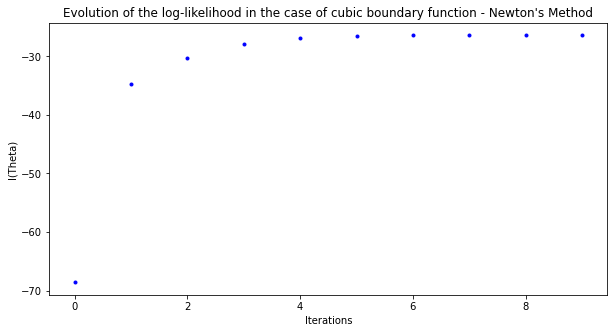

In [61]:
# Plot the log likelihood values in the optimization iterations, in one of the two cases.
fig, ax = plt.subplots(num=2, figsize = (10, 5))

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(len(log_l_history_cubic)), log_l_history_cubic,'b.')
plt.title("Evolution of the log-likelihood in the case of cubic boundary function - Newton's Method")
plt.show()

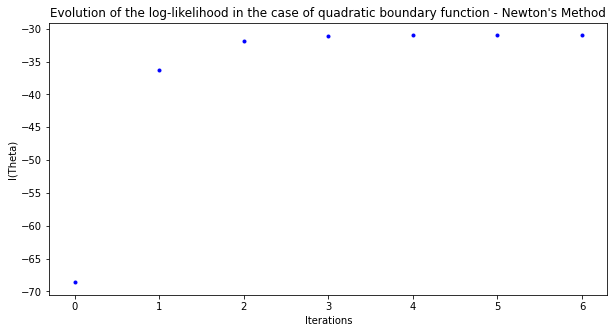

In [62]:
fig, ax = plt.subplots(num=2, figsize = (10, 5))

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(len(log_l_history_quad)), log_l_history_quad,'b.')
plt.title("Evolution of the log-likelihood in the case of quadratic boundary function - Newton's Method")
plt.show()

### (b) Plot the computed non-linear boundary and discuss the questions

First, define a boundary_function to compute the boundary equation for the input feature vectors $x_1$ and $x_2$, according to estimated parameters theta, both in the case of quadratic (theta_final_quad) and of quadratic and cubic features (theta_final_cubic). Refer for the equation to the introductory part of Question 3.

In [63]:
def boundary_function(x1_vec, x2_vec, theta_final):
    
    x1_vec, x2_vec = np.meshgrid(x1_vec,x2_vec)
    
    if len(theta_final) == 6:
        # boundary function value for features up to quadratic
        c_0, c_1, c_2, c_3, c_4, c_5 = theta_final
        # Computing f according to the definition
        f = c_0 + c_1*x1_vec + c_2*x2_vec + c_3*x1_vec**2 + c_4*x2_vec**2 + c_5*x1_vec*x2_vec

    elif len(theta_final) == 10:
        # boundary function value for features up to cubic
        c_0, c_1, c_2, c_3, c_4, c_5, c_6, c_7, c_8, c_9 = theta_final
        # Computing f according to the definition
        f = c_0 + c_1*x1_vec + c_2*x2_vec + c_3*x1_vec**2 + c_4*x2_vec**2 + c_5*x1_vec*x2_vec + c_6*x1_vec**3 + c_7*x2_vec**3 + c_8*x2_vec*x1_vec**2 + c_9*x1_vec*x2_vec**2
    
    else:
        raise("Number of Parameters is not correct")
        
    return x1_vec, x2_vec, f

Now plot the decision boundaries corresponding to the theta_final_quad and theta_final_cubic solutions.

Text(0.5, 1.0, 'Quadratic decision boundary')

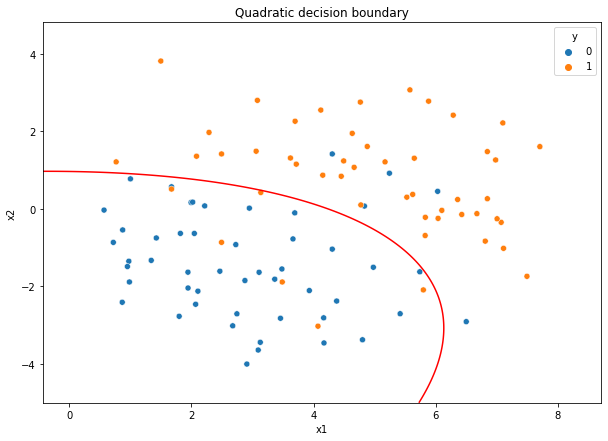

In [64]:
x1_vec = np.linspace(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_quad)

fig = plt.figure(figsize = (10, 7))
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])
plt.title('Quadratic decision boundary')

Text(0.5, 1.0, 'Cubic decision boundary')

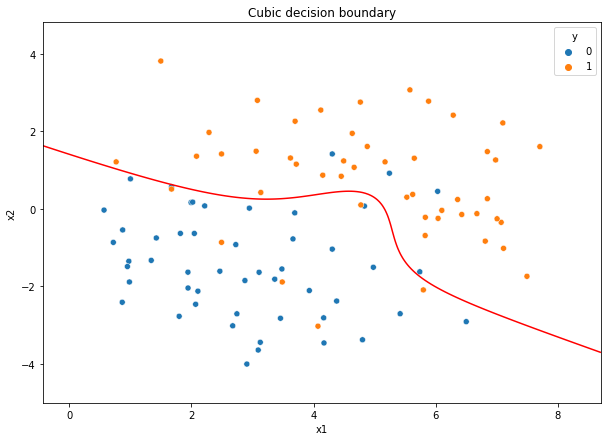

In [65]:
x1_vec = np.linspace(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_cubic)

fig = plt.figure(figsize = (10, 7))
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])
plt.title('Cubic decision boundary')

Write now your considerations. Discuss in particular:
- What happens if you further increase the degree of the polynomial. How would the boundary change? Would you incur underfitting or overfitting?
- Look at the boundary of the quadratic and cubic polynomial features. Do they meet your expectations? Why? Consider in particular the classifier decision boundary in areas where there are fewer training data, i.e. where the classifier is supposed to generalize. Hint: Try changing the minimum and maximum limits in vectors x1_vec and x2_vec before plotting the boundaries.
- Look at the values of the original features, the 2nd and 3rd degree ones. Do you expect that normalizing the input features (either by setting their range to [-1,1] or by subtracting their mean and dividing by their standard deviation) would improve the classifier? Why yes or why not?

First of all, if we further increase the degree of the polynomial, the boundary will for sure change. Raising the degree of the polynomial would result in having more regularity in the boundary function, this may cause overfitting.

The boundary of the quadratic and cubic polynomial features do seperate better than the first linear model. The regularity created by using polynomial functions helps learning the noise points from the data.

Let's increase the degree of the polynomial. We'll consider the following decision boundary :

$$f(x_{1}, x_{2}) = c_{0} + c_{1}x_{1} + c_{2}x_{2} + c_{3}x_{1}^{2} + c_{4}x_{2}^2 + c_{5}x_{1}x_{2} + c_{6}x_{1}^{3} + c_{7}x_{2}^{3} + c_{8}x_{1}^{2}x_{2} + c_{9}x_{1}x_{2}^{2} + c_{10}x_{1}^{4} + c_{11}x_{2}^{4} + c_{12}x_{1}^{3}x_{2} + c_{13}x_{1}^{2}x_{2}^{2} + c_{14}x_{1}x_{2}^{3}$$

In [66]:
#Create new features for the 4th degree
x1x1x1x1 = (x[:,1]**4).reshape(-1, 1)
x2x2x2x2 = (x[:,2]**4).reshape(-1, 1)
x1x1x2x2 = (x[:,1]**2*x[:,2]**2).reshape(-1, 1)
x1x1x1x2 = (x[:,2]*x[:,1]**3).reshape(-1, 1)
x1x2x2x2 = (x[:,1]*x[:,2]**3).reshape(-1, 1)

#Stack the features (x_new_cubic + new 4th degree features)
x_new = np.hstack([x_new_cubic, x1x1x1x1, x2x2x2x2, x1x1x1x2, x1x1x2x2, x1x2x2x2])

#Initialize theta
theta0_new = np.zeros(x_new.shape[1])

# Run Newton's method
theta_final_new, theta_history_new, log_l_history_new, grad_l_history_new = newton(theta0_new, x_new, y, 
                                                                                   grad_l(theta0_new, x_new, y),
                                                                                   hess_l(theta0_new, x_new, y),
                                                                                   1e-6)


Let's code the new decision function with editing the previous $boundary\_function$ code. 

In [67]:
def boundary_function(x1_vec, x2_vec, theta_final):
    
    x1_vec, x2_vec = np.meshgrid(x1_vec,x2_vec)
    
    if len(theta_final) == 6:
        # boundary function value for features up to quadratic
        c_0, c_1, c_2, c_3, c_4, c_5 = theta_final
        f = c_0 + c_1*x1_vec + c_2*x2_vec + c_3*x1_vec**2 + c_4*x2_vec**2 + c_5*x1_vec*x2_vec
    
    elif len(theta_final) == 10:
        # boundary function value for features up to cubic
        c_0, c_1, c_2, c_3, c_4, c_5, c_6, c_7, c_8, c_9 = theta_final
        f = c_0 + c_1*x1_vec + c_2*x2_vec + c_3*x1_vec**2 + c_4*x2_vec**2 + c_5*x1_vec*x2_vec + c_6*x1_vec**3 + c_7*x2_vec**3 + c_8*x2_vec*x1_vec**2 + c_9*x1_vec*x2_vec**2
   
    #This case is the 4th degree decision boundary case
    elif len(theta_final) == 15:
        c_0, c_1, c_2, c_3, c_4, c_5, c_6, c_7, c_8, c_9, c_10, c_11, c_12, c_13, c_14 = theta_final
        f = c_0 + c_1*x1_vec + c_2*x2_vec + c_3*x1_vec**2 + c_4*x2_vec**2 + c_5*x1_vec*x2_vec + c_6*x1_vec**3 + c_7*x2_vec**3 + c_8*x2_vec*x1_vec**2 + c_9*x1_vec*x2_vec**2 + c_10*x1_vec**4 + c_11*x2_vec**4 + c_12*x1_vec**3*x2_vec + c_13*x1_vec**2*x2_vec**2 + c_14*x1_vec*x2_vec**3
    
    else :
        raise("Number of Parameters is not correct")
        
    return x1_vec, x2_vec, f

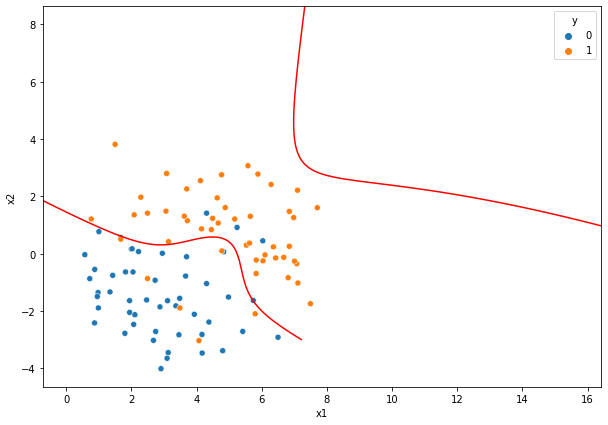

In [68]:
x1_vec = np.linspace(df_x_pl["x1"].min()/2-1,2*df_x_pl["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl["x2"].min()/2-1,2*df_x_pl["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_new)

fig = plt.figure(figsize = (10, 7))
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])
plt.show('Decision boundary for a 4th degree polynomial decision boundary')

As we see, the new decision function separates the plane into 3 regions. Initially, the problem was to linearly separate the data points, and it is more logical to say that the upper region would only contain blue points. This would result in overfitting.

Let's now see what happens in the regions with few training data, we'll change the x1 and x2 axis limits before plotting.

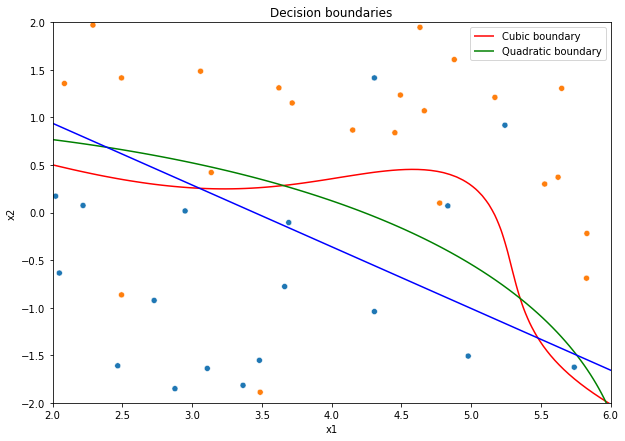

In [71]:
x1_vec = np.linspace(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_cubic)

fig, ax = plt.subplots(figsize = (10, 7))
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

cubic = plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])


x1_vec = np.linspace(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_quad)
quad = plt.contour(x1_vec, x2_vec, f, colors="green", levels=[0])

x1_vec = np.linspace(df_x_pl["x1"].min(),df_x_pl["x1"].max(),2);
plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="blue", label = 'Linear boundary')


ax.set_xlim(2, 6)
ax.set_ylim(-2, 2)
plt.legend([cubic.collections[0], quad.collections[0]],['Cubic boundary','Quadratic boundary'])
plt.title('Decision boundaries')
plt.show()

Concerning the normalization of the features, it would generally improve the classifier as it would let the model treat features equally (due to the fact that they are ranging between the same bounds). However, in our case, the features of the 2nd and 3rd degrees have greater values than the features of the 1st degree. 

We can compute the mean and the maximum for these features :

In [72]:
print("mean value for the 2nd degree of x1 : ", np.mean(x1x1))
print("mean value for the 3nd degree of x1 : ", np.mean(x1x1x1))
print("max value for the 2nd degree of x1 : ", max(x1x1)[0])
print("max value for the 3nd degree of x1 : ", max(x1x1x1)[0])

mean value for the 2nd degree of x1 :  19.079381746788112
mean value for the 3nd degree of x1 :  104.48784643598466
max value for the 2nd degree of x1 :  59.37319840648035
max value for the 3nd degree of x1 :  457.49427862521264


Therefore, normalizing these features can result in getting too high values for the related components $c_{i}$. Besides, the intercept $c_{0}$ would be also affected.

Let's normalize all the features and see what happens to the decision boundary

In [73]:
def normalize(feature) :
    return feature/max(feature)

We will normalize all the features and stack them together for both cubic and quadratic decision functions.

In [74]:
#Stack the normalized features for the cubic case, we only normalize the 2nd and 3rd degree features 
x_new_cubic_normalized = np.hstack([np.ones(x1.shape).reshape(-1, 1),
                                    x1.reshape(-1, 1), x2.reshape(-1, 1), 
                                    normalize(x1x1), normalize(x2x2), normalize(x1x2),
                                    normalize(x1x1x1), normalize(x2x2x2), normalize(x1x1x2), normalize(x1x2x2)])
#Stack the normalized features for the quadratic case, we only normalize the 2nd degree features
x_new_quad_normalized = np.hstack([np.ones(x1.shape).reshape(-1, 1),
                                   x1.reshape(-1, 1), x2.reshape(-1, 1), 
                                   normalize(x1x1), normalize(x2x2), normalize(x1x2)])

Then, we run the Newton's algorithm to compute the optimal $\theta$.

In [75]:
theta0_cubic_normalized = np.zeros(x_new_cubic_normalized.shape[1])

# Run Newton's method, in case of cubic normalized features
theta_final_cubic_normalized, theta_history_cubic_normalized, log_l_history_cubic_normalized, g_cubic_hist = newton(theta0_cubic_normalized, x_new_cubic_normalized, y, 
                                                                                                                   grad_l(theta0_cubic_normalized, x_new_cubic_normalized, y),
                                                                                                                   hess_l(theta0_cubic_normalized, x_new_cubic_normalized, y),
                                                                                                                   1e-6)

theta0_quad_normalized = np.zeros(x_new_quad_normalized.shape[1])
 
# Run Newton's method, in case of quadratic normalized features
theta_final_quad_normalized, theta_history_quad_normalized, log_l_history_quad_normalized, g_quad_hist = newton(theta0_quad_normalized, x_new_quad_normalized, y, 
                                                                                                               grad_l(theta0_quad_normalized, x_new_quad_normalized, y),
                                                                                                               hess_l(theta0_quad_normalized, x_new_quad_normalized, y),
                                                                                                               1e-6)

Let's first compare the optimized $\theta$ in the normal vs the normalized case.

In [76]:
print('Difference between theta in normalized and non-normalized features cases - cubic : \n', theta_final_cubic_normalized - theta_final_cubic)
print('Difference between theta in normalized and non-normalized features cases - quadratic : \n', theta_final_quad_normalized - theta_final_quad)

Difference between theta in normalized and non-normalized features cases - cubic : 
 [-1.51700874e-12  1.35003120e-12  6.67910172e-13 -1.77432883e+02
  2.80757395e+01 -4.49780336e+01  1.18299429e+02  8.04586729e+00
  2.70618346e+01 -1.65543862e+01]
Difference between theta in normalized and non-normalized features cases - quadratic : 
 [ 1.02140518e-14 -6.49480469e-15 -8.88178420e-16  4.11643498e+00
  2.74386010e+00 -2.08747569e+00]


As we can see from the previous cell print result, there is too much difference between some of the optimal $\theta$ components in the normalized and the non-normalized features cases. Let's see what happens to the classifier boundary.

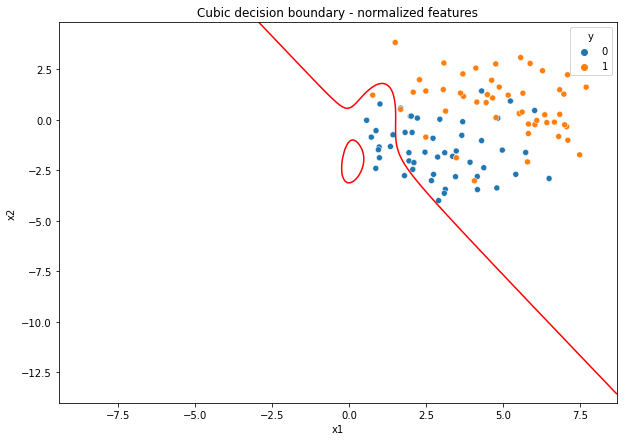

In [79]:
x1_vec = np.linspace(df_x_pl["x1"].min()-10,df_x_pl["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl["x2"].min()-10,df_x_pl["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_cubic_normalized)

fig = plt.figure(figsize = (10, 7))
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);
plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])
plt.title('Cubic decision boundary - normalized features')
plt.show()

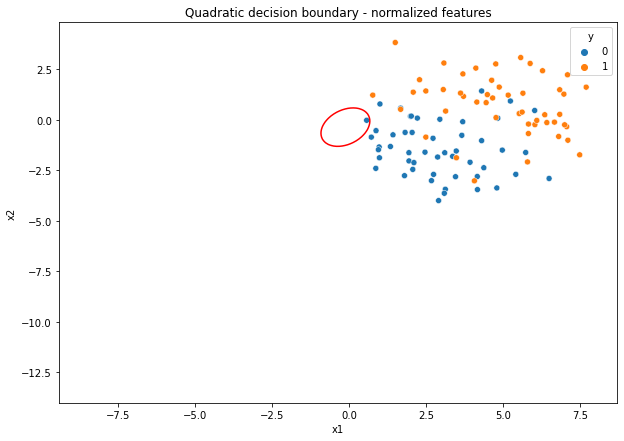

In [80]:
x1_vec = np.linspace(df_x_pl["x1"].min()-10,df_x_pl["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl["x2"].min()-10,df_x_pl["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_quad_normalized)

fig = plt.figure(figsize = (10, 7))
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])
plt.title('Quadratic decision boundary - normalized features')
plt.show()

In both cases (cubic and quadratic), the decision boundary moved to the left. We clearly see that normalizing the features have not improved our classifier.


## [10 points, extra, not compulsory] Question 4: Gaussian Discriminant Analysis

### (a) Review and implement classification with Gradient Discriminant Analysis (GDA)

Recall the assumptions for GDA

$\begin{aligned} y & \sim \operatorname{Bernoulli}(\phi) \\ x \mid y=0 & \sim \mathcal{N}\left(\mu_{0}, \Sigma\right) \\ x \mid y=1 & \sim \mathcal{N}\left(\mu_{1}, \Sigma\right) \end{aligned}$

Recall the probability distributions:

$\begin{aligned} p(y) &=\phi^{y}(1-\phi)^{1-y} \\ p(x \mid y=0) &=\frac{1}{(2 \pi)^{d / 2}|\Sigma|^{1 / 2}} \exp \left(-\frac{1}{2}\left(x-\mu_{0}\right)^{T} \Sigma^{-1}\left(x-\mu_{0}\right)\right) \\ p(x \mid y=1) &=\frac{1}{(2 \pi)^{d / 2}|\Sigma|^{1 / 2}} \exp \left(-\frac{1}{2}\left(x-\mu_{1}\right)^{T} \Sigma^{-1}\left(x-\mu_{1}\right)\right) \end{aligned}$

Overall, the parameters of the model are $\phi, \Sigma, \mu_{0}$ and $\mu_{1}$ and the log-likelihood is given by:

$\begin{aligned} \ell\left(\phi, \mu_{0}, \mu_{1}, \Sigma\right) &=\log \prod_{i=1}^{n} p\left(x^{(i)}, y^{(i)} ; \phi, \mu_{0}, \mu_{1}, \Sigma\right) \\ &=\log \prod_{i=1}^{n} p\left(x^{(i)} \mid y^{(i)} ; \mu_{0}, \mu_{1}, \Sigma\right) p\left(y^{(i)} ; \phi\right) \end{aligned}$

Parameters may be estimated by maximum likelihood estimate as follows:

$\begin{aligned} \phi &=\frac{1}{n} \sum_{i=1}^{n} 1\left\{y^{(i)}=1\right\} \\ \mu_{0} &=\frac{\sum_{i=1}^{n} 1\left\{y^{(i)}=0\right\} x^{(i)}}{\sum_{i=1}^{n} 1\left\{y^{(i)}=0\right\}} \\ \mu_{1} &=\frac{\sum_{i=1}^{n} 1\left\{y^{(i)}=1\right\} x^{(i)}}{\sum_{i=1}^{n} 1\left\{y^{(i)}=1\right\}} \\ \Sigma &=\frac{1}{n} \sum_{i=1}^{n}\left(x^{(i)}-\mu_{y^{(i)}}\right)\left(x^{(i)}-\mu_{y^{(i)}}\right)^{T} \end{aligned}$

Consider the data variables as from the previous questions, x and y.
For this question, we would select features $x^{(i)}_1$ and $x^{(i)}_2$ into the new varible x12, dropping the $x_0=1$ convention.

In [81]:
def compute_phi(y):
    phi = 0
    for i in range(len(y)) :
        if y[i] == 1 :
            phi += 1
    return phi/len(y)


def compute_mu0(x, y):
    s1 = 0
    s2 = 0
    for i in range(len(y)) :
        if y[i] == 0 :
            s1 += x[i,:]
            s2 += 1
    mu0 = s1/s2
    return mu0

def compute_mu1(x, y):
    s1 = 0
    s2 = 0
    for i in range(len(y)) :
        if y[i] == 1 :
            s1 += x[i,:]
            s2 += 1
    mu1 = s1/s2
    return mu1

def compute_sigma(x, y, mu0, mu1):
    sigma_sum = np.zeros([x.shape[1], x.shape[1]])
    mu = np.zeros([y.shape[0], x.shape[1]])
    
    for i in range(len(y)) :
        if y[i] == 1 :
            sigma_sum = sigma_sum + (x[i].reshape(1, x.shape[1]).T - mu1.reshape(x.shape[1], 1)).dot((x[i].reshape(1, x.shape[1]).T - mu1.reshape(x.shape[1], 1)).T)
        else :
            sigma_sum = sigma_sum + (x[i].reshape(1, x.shape[1]).T - mu0.reshape(x.shape[1], 1)).dot((x[i].reshape(1, x.shape[1]).T - mu0.reshape(x.shape[1], 1)).T)
    
    sigma = sigma_sum/len(y)
    return sigma
   

# computing p(x|y) for the Bayes rule
def p_x_given_y(x,mu,sigma):
    l = (2*np.pi)**(len(x)/2)*np.sqrt(np.linalg.det(sigma))
    return np.exp(-0.5*np.dot(x - mu, np.dot(np.linalg.inv(sigma), x - mu)))/l

In [82]:
# First extract the sole features x1 and x2 from x into an x12 array and reshape it to x2 vector arrays
x12 = x[:,1:]
print(x[:5,:]) # For visualization of the first 5 values
print(x12[:5,:]) # For visualization of the first 5 values
print(y[:5]) # For visualization of the first 5 values

[[ 1.          1.3432504  -1.3311479 ]
 [ 1.          1.8205529  -0.6346681 ]
 [ 1.          0.98632067 -1.8885762 ]
 [ 1.          1.9443734  -1.635452  ]
 [ 1.          0.97673352 -1.3533151 ]]
[[ 1.3432504  -1.3311479 ]
 [ 1.8205529  -0.6346681 ]
 [ 0.98632067 -1.8885762 ]
 [ 1.9443734  -1.635452  ]
 [ 0.97673352 -1.3533151 ]]
[0 0 0 0 0]


Now code up the equations above to learn the GDA parameters from the training data.

In [83]:
# First extract the sole features x1 and x2 from x into an x12 array and reshape it to x2 vector arrays
x12 = x[:,1:]
print(x[:5,:]) # For visualization of the first 5 values
print(x12[:5,:]) # For visualization of the first 5 values
print(y[:5]) # For visualization of the first 5 values

[[ 1.          1.3432504  -1.3311479 ]
 [ 1.          1.8205529  -0.6346681 ]
 [ 1.          0.98632067 -1.8885762 ]
 [ 1.          1.9443734  -1.635452  ]
 [ 1.          0.97673352 -1.3533151 ]]
[[ 1.3432504  -1.3311479 ]
 [ 1.8205529  -0.6346681 ]
 [ 0.98632067 -1.8885762 ]
 [ 1.9443734  -1.635452  ]
 [ 0.97673352 -1.3533151 ]]
[0 0 0 0 0]


In [84]:
# Support functions

# Function p(y) for applying the Bayes rule
def p_y(y,phi):
    if y==1: return phi
    else: return 1-phi

In [85]:
# Now estimate the GDA parameters
phi = compute_phi(y)
mu0 = compute_mu0(x12,y)
mu1 = compute_mu1(x12,y)
sigma = compute_sigma(x12, y, mu0, mu1)

phi,mu0,mu1,sigma

(0.494949494949495,
 array([ 2.93068144, -1.44476469]),
 array([4.93616668, 0.76771897]),
 array([[ 2.68174521, -0.46404053],
        [-0.46404053,  1.88367821]]))

Now that we know both the distributions of $p(y)$ and $p(x|y)$, we may estimate the posterior probability for an input $x$ via Bayes Rule:

\begin{equation}
p(y \mid x)=\frac{p(x \mid y) p(y)}{p(x)}
\end{equation}
where $p(x)$ is the same for both classes and may be disregarded.

This is used to classify each data point, by comparing $p(y=1|x) \propto p(x \mid y=1) p(y=1)$ and $p(y=0|x) \propto p(x \mid y=0) p(y=0)$.

In [86]:
selected_example=1
print('Selected example =', x12[selected_example,:])

# compute p(y=0|x) ~ p(x|y=0)*p(y=0)  &  p(y=1|x) ~ p(x|y=1)*p(y=1)

# y=0
print('p(y=0|x) ~', p_x_given_y(x12[selected_example,:],mu0,sigma)*p_y(0,phi))

# y=1
print('p(y=1|x) ~', p_x_given_y(x12[selected_example,:],mu1,sigma)*p_y(1,phi))

Selected example = [ 1.8205529 -0.6346681]
p(y=0|x) ~ 0.026129116841520316
p(y=1|x) ~ 0.0020617882761784934


In [87]:
len(y)

99

### (b) Plot the estimated likelihood functions, the decision boundary and write your remarks



In [88]:
def boundary_gda(x1_vec, x2_vec, mu0, mu1, sigma, phi):
    
    x1_vec, x2_vec = np.meshgrid(x1_vec,x2_vec)
    
    f=np.zeros(x1_vec.shape)
    
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            x12_ij = np.array( (x1_vec[i,j],x2_vec[i,j]) )
            f[i,j] = p_x_given_y(x12_ij,mu1,sigma)*p_y(1,phi) - p_x_given_y(x12_ij,mu0,sigma)*p_y(0,phi)
            
    return x1_vec, x2_vec, f


x1_vec = np.linspace(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1,200);
x2_vec = np.linspace(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1,200);

x1_vec, x2_vec, f = boundary_gda(x1_vec, x2_vec, mu0, mu1, sigma, phi)

In [89]:
sigma

array([[ 2.68174521, -0.46404053],
       [-0.46404053,  1.88367821]])

(-0.42920059, 8.705400599999999)

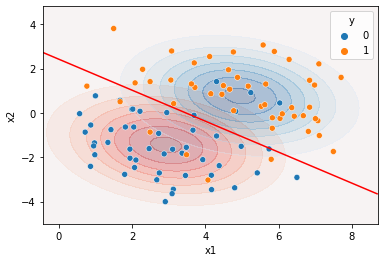

In [90]:
from matplotlib import cm
from scipy.stats import multivariate_normal

# Define Gaussian pdfs
rv0 = multivariate_normal(mu0, sigma)
rv1 = multivariate_normal(mu1, sigma)

pairx12 = np.dstack((x1_vec, x2_vec))

# plot pdf contours
plt.contourf(x1_vec, x2_vec, rv0.pdf(pairx12),alpha=0.5,cmap=cm.Reds)
plt.contourf(x1_vec, x2_vec, rv1.pdf(pairx12),alpha=0.35,cmap=cm.Blues)

# Add the GDA classification to the plot
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl);
plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])

plt.ylim(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1)
plt.xlim(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1)

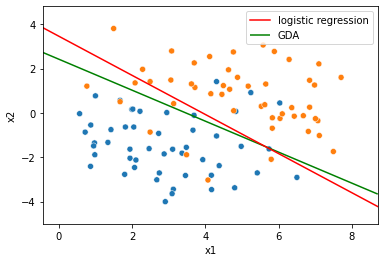

In [91]:
# For comparison with the Logistic Regression boundary

# Generate vector to plot decision boundary
x1vec = np.linspace(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1,2)

# Plot raw data
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x_pl)

# Plot decision boundary
log, = plt.plot(x1vec,(-x1vec*theta_GA[1]-theta_GA[0])/theta_GA[2], color="red")
gda = plt.contour(x1_vec, x2_vec, f, colors="green", levels=[0])

plt.legend([log, gda.collections[0]],['logistic regression','GDA'])

plt.ylim(df_x_pl["x2"].min()-1,df_x_pl["x2"].max()+1)
plt.xlim(df_x_pl["x1"].min()-1,df_x_pl["x1"].max()+1)

# plt.legend()
plt.show()

Write now your considerations. Discuss in particular:
- Gaussian Discriminant Analysis makes stronger modelling assumptions than logistic regression. When may this be helpful and where may this be harmful?


We see that Gaussian Discriminant Analysis and Logistic Regression give different decision boundaries.

The *Gaussian Discriminant Analysis* makes more specific assumptions about the data than the *Logistic Regression*, in particoular the assumption about the probability distribution $p(x \mid y)$. On the other side, the assumption about $p(y \mid x)$ is made by both models (Bernoulli).

Generally, we would use the logistic regression because there are less assumptions on the underlying distribution of the data. On the other hand, if we know that the data has the shape of a Gaussian (either by visualizing the data or by knowing it priorly) or if we have a less amount of data, we will use the Gaussian Discriminant Analysis.